In [1]:
"""
Gaussian Processes regression examples
"""
MPL_AVAILABLE = True
try:
    import matplotlib.pyplot as plt
except ImportError:
    MPL_AVAILABLE = False

import numpy as np
import GPy

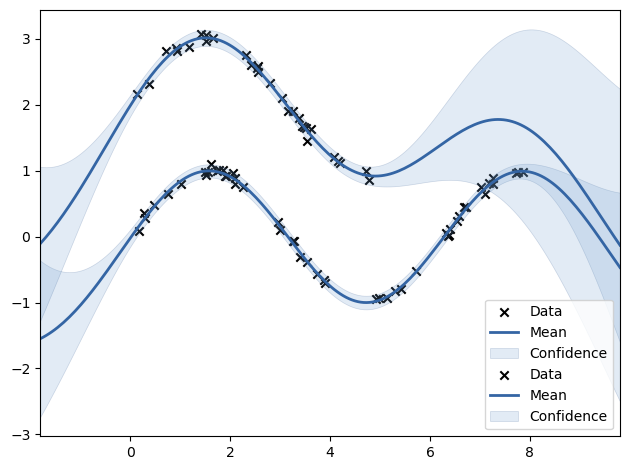

In [2]:
def coregionalization_toy(optimize=True, plot=True):
    """
    A simple demonstration of coregionalization on two sinusoidal functions.
    """
    # build a design matrix with a column of integers indicating the output
    X1 = np.random.rand(50, 1) * 8
    X2 = np.random.rand(30, 1) * 5

    # build a suitable set of observed variables
    Y1 = np.sin(X1) + np.random.randn(*X1.shape) * 0.05
    Y2 = np.sin(X2) + np.random.randn(*X2.shape) * 0.05 + 2.0

    m = GPy.models.GPCoregionalizedRegression(X_list=[X1, X2], Y_list=[Y1, Y2])

    if optimize:
        m.optimize("bfgs", max_iters=100)

    if MPL_AVAILABLE and plot:
        slices = GPy.util.multioutput.get_slices([X1, X2])
        m.plot(
            fixed_inputs=[(1, 0)],
            which_data_rows=slices[0],
            Y_metadata={"output_index": 0},
        )
        m.plot(
            fixed_inputs=[(1, 1)],
            which_data_rows=slices[1],
            Y_metadata={"output_index": 1},
            ax=plt.gca(),
        )
    return m

m = coregionalization_toy()

In [162]:
predict.shape

(8, 1)

In [187]:
np.random.seed(42)
predict = np.random.rand(8, 1)
proxy = np.random.choice(predict.ravel(), 4, replace=False).reshape(-1, 1)
field = np.random.choice(proxy.ravel(), 2, replace=False).reshape(-1, 1)


# build a suitable set of obsrved variables
Ypredict = (np.sin(predict + 10.5) + np.random.randn(*predict.shape) * 0.05)
Yproxy = (np.sin(proxy) + np.random.randn(*proxy.shape) * 0.05 )
Yfield = (np.sin(field) + np.random.randn(*field.shape) * 0.05 )

m = GPy.models.GPCoregionalizedRegression(X_list=[predict, proxy, field], 
                                          Y_list=[Ypredict, Yproxy, Yfield])


import pandas as pd
import altair as alt

observations = []
for x, y in zip(predict, Ypredict):
    observations.append({"x": x, "y": y, "T": "predict"})

for x, y in zip(proxy, Yproxy):
    observations.append({"x": x, "y": y, "T": "proxy"})
  
for x, y in zip(field, Yfield):
    observations.append({"x": x, "y": y, "T": "field"})
    
df = pd.DataFrame(observations)

def make_chart(_df, title):
    return alt.Chart(_df).mark_circle(size=60).encode(
            x=alt.X('x:O', axis=alt.Axis(values=list(range(1, 10, 1)))),
            y=alt.Y('y:O', axis=alt.Axis(title=title, values=list(range(0, 1, 1))))).properties(
            width=200,
            height=200
        )
    
make_chart(df[df["T"] == "proxy"], title="Field study score")

 /opt/homebrew/anaconda3/envs/causaldsr/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning:iteritems is deprecated and will be removed in a future version. Use .items instead.


alt.Chart(...)

In [171]:
make_chart(df[df["T"] == "proxy"])

alt.Chart(...)

In [172]:
make_chart(df[df["T"] == "field"])

alt.Chart(...)

In [3]:
Y_metadata1 = {'output_index': np.array([[0]])}
xstar = np.random.rand(1, 1).reshape(1,-1)
xs = np.random.rand(1, 2).reshape(1,-1)
m.predict(xs, Y_metadata=Y_metadata1)

(array([[0.75642053]]), array([[0.0029555]]))

In [5]:
%load_ext autoreload
%autoreload 2

In [66]:
from src.kl import KL
from src.kl import KL
k = KL(input_dim=2, A=-1, B=0)

# 10 random bernoulli distros
X = np.random.rand(10,2)
X = X/(np.sum(X, axis=1).reshape(10, 1))
mu = np.zeros((10)) # vector of the means
C = k.K(X,X) # covariance matrix


array([[ 1.        ,  1.0104982 ,  5.47373255,  1.1537077 ,  1.1121975 ,
         1.03663071,  1.05617977,  1.39943625,  1.13984694,  1.00016494],
       [ 1.0104982 ,  1.        ,  4.23374166,  1.07910681,  1.05140488,
         1.08894299,  1.11954763,  1.2561103 ,  1.06970837,  1.00801547],
       [ 5.47373255,  4.23374166,  1.        ,  2.34609903,  2.59205244,
         9.30965367, 10.64107754,  1.67902581,  2.41927147,  5.29388657],
       [ 1.1537077 ,  1.07910681,  2.34609903,  1.        ,  1.002711  ,
         1.38064522,  1.45454806,  1.04147348,  1.00026687,  1.14274306],
       [ 1.1121975 ,  1.05140488,  2.59205244,  1.002711  ,  1.        ,
         1.30492068,  1.36845106,  1.06643691,  1.00127509,  1.10310114],
       [ 1.03663071,  1.08894299,  9.30965367,  1.38064522,  1.30492068,
         1.        ,  1.00194621,  1.8079139 ,  1.35562022,  1.04186663],
       [ 1.05617977,  1.11954763, 10.64107754,  1.45454806,  1.36845106,
         1.00194621,  1.        ,  1.93895482

In [67]:
import altair as alt
import numpy as np
import pandas as pd

# Compute x^2 + y^2 across a 2D grid
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2

# Convert this grid to columnar data expected by Altair
source = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(source).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)

 /opt/homebrew/anaconda3/envs/causaldsr/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning:iteritems is deprecated and will be removed in a future version. Use .items instead.


alt.Chart(...)